In [519]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 

In [520]:
warnings.filterwarnings('ignore') 

In [521]:
df = pd.read_csv('house-votes-84.data', header=None)

In [522]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [523]:
X = df.iloc[:,1:]

In [524]:
y = df.iloc[:,0]

In [525]:
mapping = {'republican':1, 'democrat':0}

In [526]:
y=y.replace(mapping)

In [527]:
mapping = {'y':1, 'n':-1,'?':0}

In [528]:
X=X.replace(mapping)

In [529]:
X=np.asarray(X)
y=np.asarray(y)
y=np.transpose(y)

In [620]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [622]:
clf = AdaBoostClassifier(estimator=Perceptron(), n_estimators=50, algorithm='SAMME', random_state=42)

In [624]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', estimator=Perceptron(), random_state=42)

In [626]:
y_pred = clf.predict(X_test)

In [628]:
accuracy = clf.score(X_test, y_test)

In [630]:
print("Accuracy of Perceptron with Adaboost:", accuracy)
confusion_matrix(y_test, y_pred)

Accuracy of Perceptron with Adaboost: 0.9655172413793104


array([[54,  2],
       [ 1, 30]], dtype=int64)

In [632]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.94      0.97      0.95        31

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.96        87
weighted avg       0.97      0.97      0.97        87



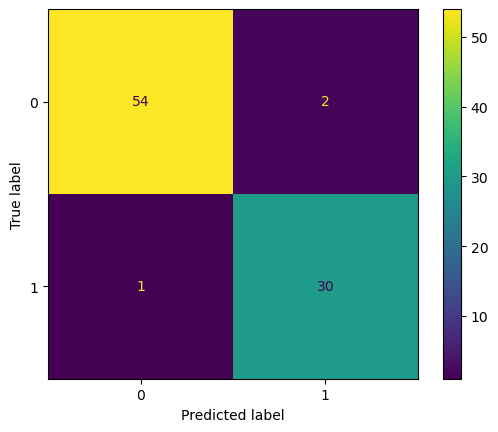

In [634]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

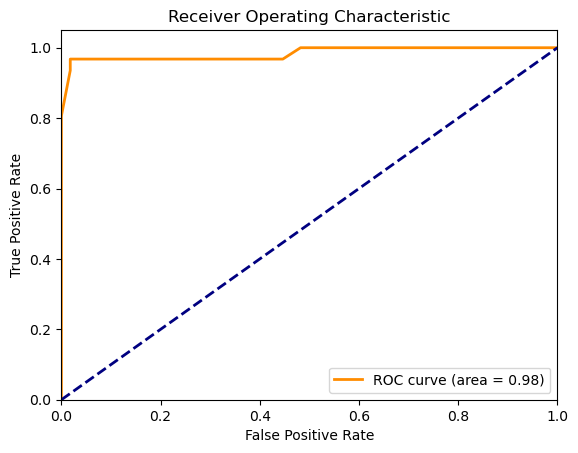

In [637]:
# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [662]:
#just Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy of Perceptron:", accuracy)
confusion_matrix(y_test, y_pred)

Accuracy of Perceptron: 0.9655172413793104


array([[55,  1],
       [ 2, 29]], dtype=int64)

In [664]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.97      0.94      0.95        31

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.96        87
weighted avg       0.97      0.97      0.97        87



In [666]:
#just Decision Tree
clf =  DecisionTreeClassifier(max_depth=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy of Decision Tree:", accuracy)
confusion_matrix(y_test, y_pred)

Accuracy of Decision Tree: 0.9655172413793104


array([[54,  2],
       [ 1, 30]], dtype=int64)

In [668]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.94      0.97      0.95        31

    accuracy                           0.97        87
   macro avg       0.96      0.97      0.96        87
weighted avg       0.97      0.97      0.97        87



In [670]:
#Decision Tree with Adaboost
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, algorithm='SAMME.R', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy of Decision Tree with Adaboost:", accuracy)
confusion_matrix(y_test, y_pred)

Accuracy of Decision Tree with Adaboost: 0.9540229885057471


array([[55,  1],
       [ 3, 28]], dtype=int64)

In [672]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        56
           1       0.97      0.90      0.93        31

    accuracy                           0.95        87
   macro avg       0.96      0.94      0.95        87
weighted avg       0.95      0.95      0.95        87



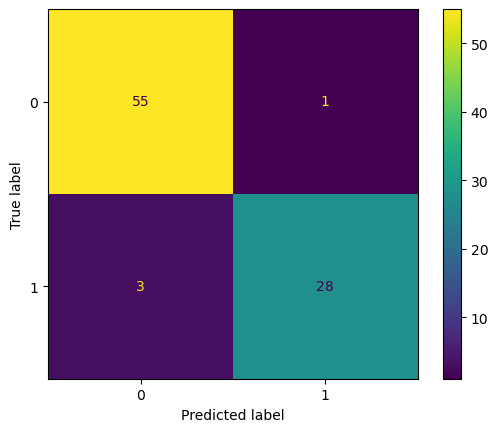

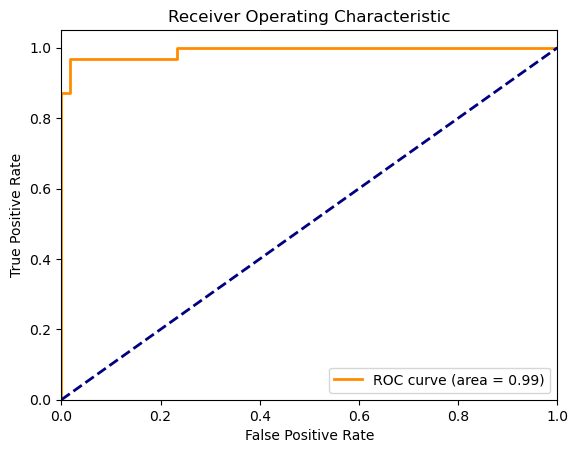

In [647]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [650]:
#Combined Perceptron and Decision Tree
base_classifiers = [
    DecisionTreeClassifier(max_depth=1),
    Perceptron()
]

ada_classifiers = []
for clf in base_classifiers:
    ada_clf = AdaBoostClassifier(estimator=clf, n_estimators=50, algorithm='SAMME', random_state=42)
    ada_clf.fit(X_train, y_train)
    ada_classifiers.append(ada_clf)



In [614]:
# Make predictions using each AdaBoost classifier
predictions = []
for clf in ada_classifiers:
    predictions.append(clf.predict(X_test))

# Combine predictions (e.g., using majority voting)
final_predictions = []
for i in range(len(X_test)):
    votes = [pred[i] for pred in predictions]
    final_predictions.append(max(set(votes), key=votes.count))

# Evaluate the final predictions
accuracy = accuracy_score(y_test, final_predictions)
print("Accuracy:", accuracy)
confusion_matrix(y_test, final_predictions)

Accuracy: 0.9770114942528736


array([[56,  0],
       [ 2, 29]], dtype=int64)

In [652]:
report = classification_report(y_test, final_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.94      0.97        31

    accuracy                           0.98        87
   macro avg       0.98      0.97      0.97        87
weighted avg       0.98      0.98      0.98        87



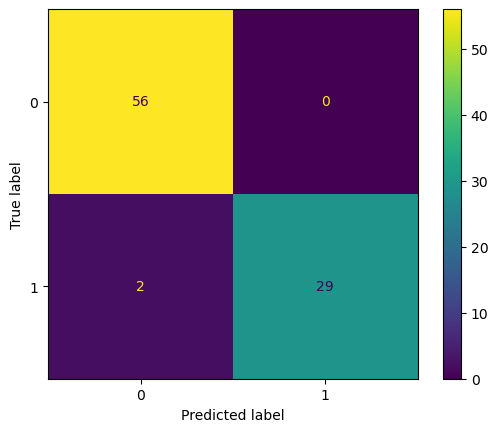

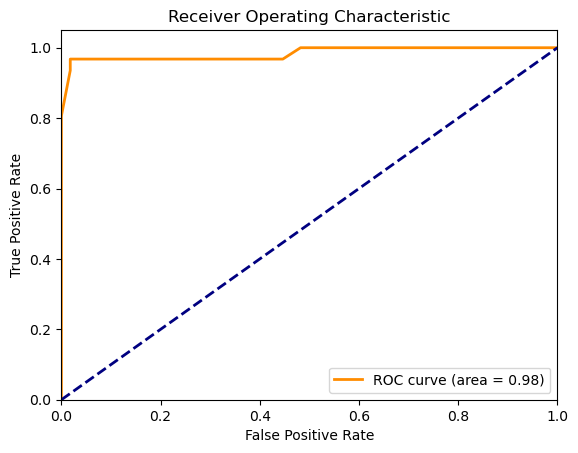

In [547]:
cm = confusion_matrix(y_test, final_predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()